Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


[ 0.  0.  0. ...,  0.  1.  0.]
Accuracy: 
0.66618705036
Confusion Matrix: 
[[549 215]
 [249 377]]


True

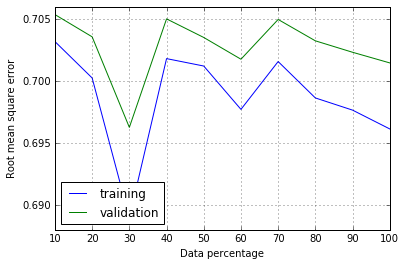

In [48]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import tree
import numpy as np
import csv
import pydotplus
from sklearn import metrics
from sklearn.externals.six import StringIO
from sklearn.cross_validation import train_test_split
from IPython.display import Image
mtrx = np.matrix(numpy.loadtxt(open("speed_dating_actual_data.csv","rU"),delimiter=",",skiprows=1))
# Creating our label vector
labels = mtrx[:,0]
# Creating our attribute vectors
attr = np.subtract(mtrx[:,7], mtrx[:,1])
sinc = np.subtract(mtrx[:,8], mtrx[:,2])
fun = np.subtract(mtrx[:,9], mtrx[:,4])
inte = np.subtract(mtrx[:,10], mtrx[:,3])
amb = np.subtract(mtrx[:,11], mtrx[:,5])
# Creating attributes and labels in separate matrices
X = np.column_stack((attr, sinc, fun, inte, amb))
Y = labels
# Creating the training set, test set and CV set
# First divide in trainingset and testset0
X_train, X_test0, y_train, y_test0 = train_test_split(
     X, Y, test_size=0.4, random_state=0)
# Then divide testset0 into testset and cv set
X_test, X_cv, y_test, y_cv = train_test_split(
     X_test0, y_test0, test_size=0.5, random_state=0)
# Finding the best depth for the decision tree with CV
depth = []
for i in range(3,200):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train,y_train)
    depth.append((i, clf.score(X_cv, y_cv)))
# Plotting the learning curves
data_percentage_array = np.linspace(10, 100, 10)
train_error = []
test_error = []
for data_percentage in data_percentage_array:
    model = tree.DecisionTreeClassifier(max_depth=4)
    number_of_samples = int(data_percentage / 100. * len(y_train))
    model.fit(X_train[:number_of_samples,:], y_train[:number_of_samples])

    predicted_train_y = model.predict(X_train)
    predicted_test_y = model.predict(X_test)

    train_error.append((predicted_train_y - y_train).std())
    test_error.append((predicted_test_y - y_test).std())
plt.plot(data_percentage_array, train_error, label='training')
plt.plot(data_percentage_array, test_error, label='validation')
plt.grid()
plt.legend(loc=3)
plt.xlabel('Data percentage')
plt.ylabel('Root mean square error');
# Implementing the decision tree with depth 4
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train,y_train)
# Find score on test set
print "Accuracy: \n", clf.score(X_test,y_test)
# Confusion matrix
print "Confusion Matrix: \n", sklearn.metrics.confusion_matrix(y_test, clf.predict(X_test))
# Visualising with the Training Data
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                         feature_names=['attr', 'sinc', 'fun', 'inte', 'amb'],  
                         class_names=['0', '1'],  
                         filled=True, rounded=True,  
                         impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("tree.pdf")

Automatically created module for IPython interactive environment


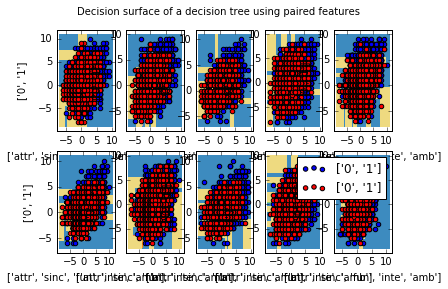

In [53]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import csv
# Parameters
n_classes = 2
plot_colors = "bry"
plot_step = 0.02

# Load data
mtrx = np.matrix(numpy.loadtxt(open("speed_dating_actual_data.csv","rU"),delimiter=",",skiprows=1))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [0, 4], [1, 2], 
                                [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]):
    # We only take the two corresponding features
    X = np.column_stack((attr, sinc, fun, inte, amb))[:, pair]
    Y = mtrx[:,0]

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, Y)

    # Plot the decision boundary
    plt.subplot(2, 5, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(['attr', 'sinc', 'fun', 'inte', 'amb'])
    plt.ylabel(['0', '1'])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=['0', '1'],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Homogeneity: 0.049


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114fa0cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d883bd0>]], dtype=object)

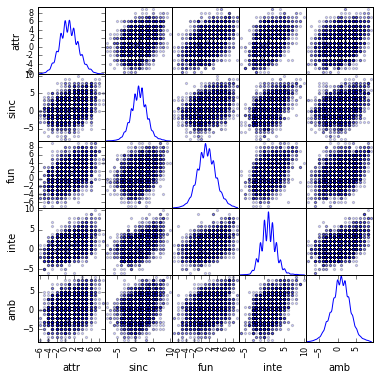

In [31]:
%pylab inline
from sklearn.cluster import KMeans
import numpy as np
import csv
import sklearn
from pandas.tools.plotting import scatter_matrix
mtrx = np.matrix(numpy.loadtxt(open("speed_dating_actual_data.csv","rU"),delimiter=",",skiprows=1))
# Creating our label vector
labels = mtrx[:,0]
# Creating our attribute vectors
attr = np.subtract(mtrx[:,7], mtrx[:,1])
sinc = np.subtract(mtrx[:,8], mtrx[:,2])
fun = np.subtract(mtrx[:,9], mtrx[:,4])
inte = np.subtract(mtrx[:,10], mtrx[:,3])
amb = np.subtract(mtrx[:,11], mtrx[:,5])
# Implementing KMeans
X = np.column_stack((attr, sinc, fun, inte, amb))
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmlabels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Calculating the homogeneity
print("Homogeneity: %0.3f" % sklearn.metrics.homogeneity_score(np.squeeze(np.asarray(labels)), kmlabels))
# Visualising the clustering
df = pd.DataFrame(X, columns=['attr', 'sinc', 'fun', 'inte', 'amb'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')